In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_excel('INF2178_A2_data.xlsx', sheet_name=0)
df

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,1059,14492,The Neighbourhood Group Downsview Child Care,Non Profit Agency,2829 KEELE ST,M3M 2G7,6,Public Elementary School,Downsview Public School,0,0,0,52,60,112,Y,Y
1059,1060,14496,Lawrence Park School,Non Profit Agency,2180 BAYVIEW AVE,M4N 3K7,15,Other,NaN,0,25,35,0,0,60,N,N
1060,1061,14497,The Munchkin Manor Daycare & Early Learning Ce...,Non Profit Agency,525 BLOOR ST E,M4W 1J1,13,Other,Place Of Worship,0,25,24,0,0,49,N,N
1061,1062,14501,Columbus Early Learning Centres - Regina Mundi,Non Profit Agency,60 PLAYFAIR AVE,M6B 2P9,8,Catholic Elementary School,Regina Mundi Catholic School,0,0,0,26,30,56,Y,Y


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


In [46]:
# feature selection

feature_name = ['AUSPICE', 'subsidy', 'TOTSPACE']
df = df[feature_name]
df

,AUSPICE,subsidy,TOTSPACE
0,Non Profit Agency,Y,164
1,Non Profit Agency,Y,83
2,Non Profit Agency,Y,102
3,Non Profit Agency,Y,65
4,Non Profit Agency,Y,26
...,...,...,...
1058,Non Profit Agency,Y,112
1059,Non Profit Agency,N,60
1060,Non Profit Agency,N,49
1061,Non Profit Agency,Y,56


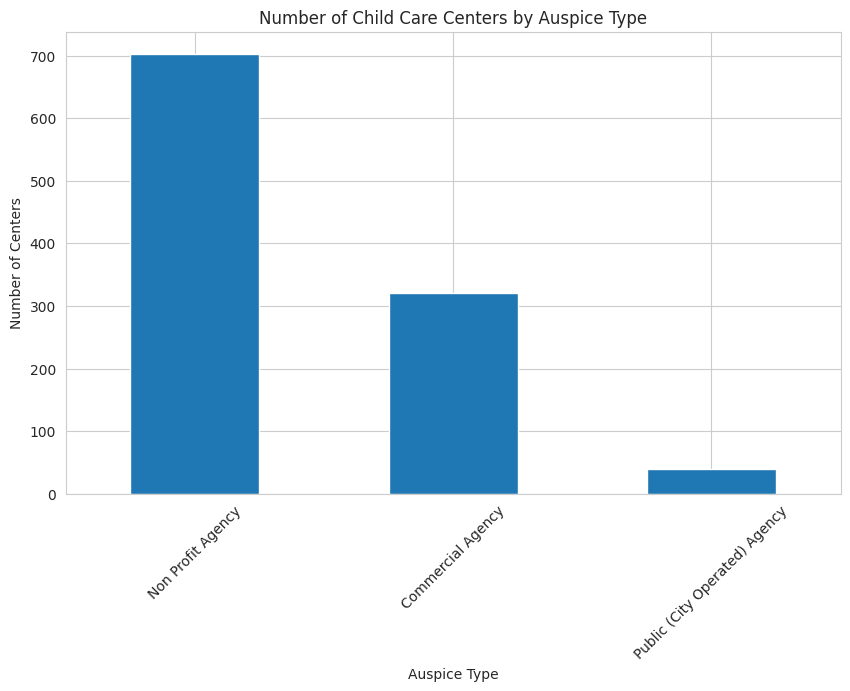

In [47]:
plt.figure(figsize=(10, 6))
df['AUSPICE'].value_counts().plot(kind='bar')
plt.title('Number of Child Care Centers by Auspice Type')
plt.xlabel('Auspice Type')
plt.ylabel('Number of Centers')
plt.xticks(rotation=45)
plt.show()

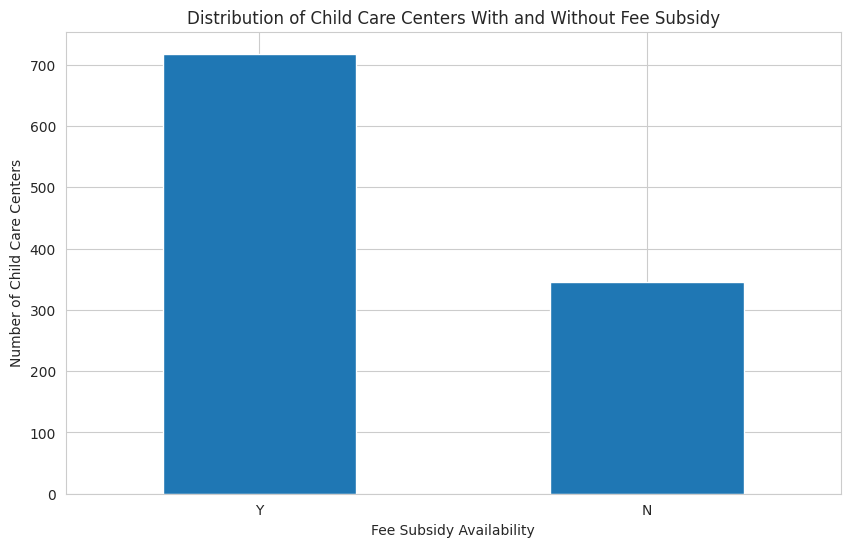

In [48]:
plt.figure(figsize=(10, 6))
df['subsidy'].value_counts().plot(kind='bar')
plt.title('Distribution of Child Care Centers With and Without Fee Subsidy')
plt.xlabel('Fee Subsidy Availability')
plt.ylabel('Number of Child Care Centers')
plt.xticks(rotation=0)
plt.show()

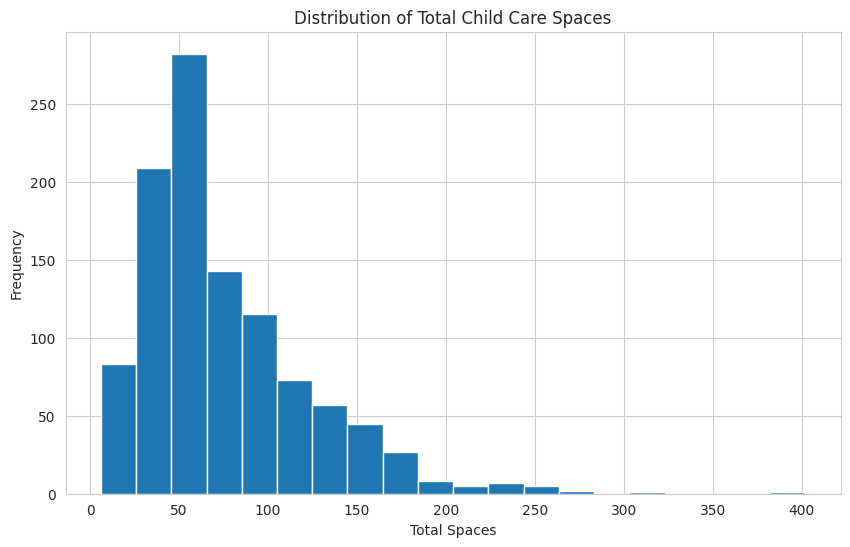

In [49]:
plt.figure(figsize=(10, 6))
df['TOTSPACE'].plot(kind='hist', bins=20)
plt.title('Distribution of Total Child Care Spaces')
plt.xlabel('Total Spaces')
plt.ylabel('Frequency')
plt.show()

# One-way ANOVA

 Is there a significant difference in the total number of child care spaces (TOTSPACE) available across different operating auspices (AUSPICE: Commercial, Non Profit, Public)?

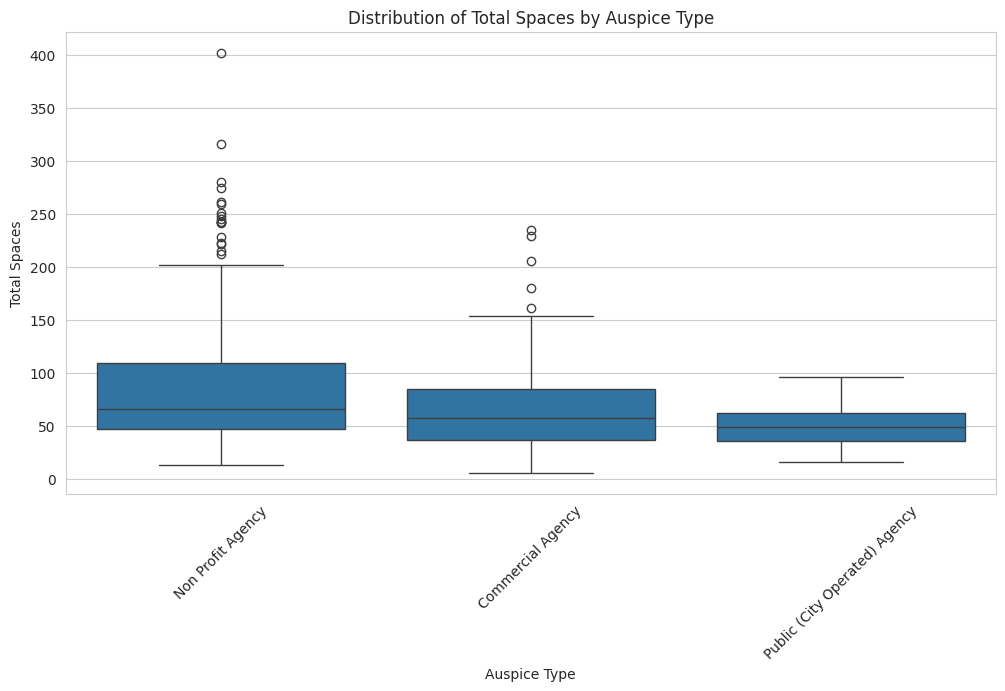

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of total spaces by auspice
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df)
plt.title('Distribution of Total Spaces by Auspice Type')
plt.xlabel('Auspice Type')
plt.ylabel('Total Spaces')
plt.xticks(rotation=45)
plt.show()

In [52]:
Q1 = df.groupby('AUSPICE')['TOTSPACE'].quantile(0.25)
Q3 = df.groupby('AUSPICE')['TOTSPACE'].quantile(0.75)
IQR = Q3 - Q1

# Defining upper quarter and lower quarter
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Applying the outlier criteria to filter the data
filtered_data = pd.DataFrame()
for auspice in df['AUSPICE'].unique():
    is_auspice = df['AUSPICE'] == auspice
    not_outlier = (df['TOTSPACE'] >= lower_bound[auspice]) & (df['TOTSPACE'] <= upper_bound[auspice])
    filtered_data = filtered_data.append(df[is_auspice & not_outlier])



<ipython-input-52-35e69e445695>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append(df[is_auspice & not_outlier])
<ipython-input-52-35e69e445695>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append(df[is_auspice & not_outlier])
<ipython-input-52-35e69e445695>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append(df[is_auspice & not_outlier])


In [54]:
# Define the model for one-way ANOVA
model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame
anova_results

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [55]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey test for one-way ANOVA
tukey = pairwise_tukeyhsd(endog=df['TOTSPACE'],groups=df['AUSPICE'],alpha=0.05)
print(tukey.summary())

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


# Two-way ANOVA

Is there an interaction effect between the operating auspice (AUSPICE) and the availability of a fee subsidy contract (subsidy) on the total number of child care spaces (TOTSPACE)?

<ipython-input-43-cb3d7b23d098>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', data=df, ci=None)


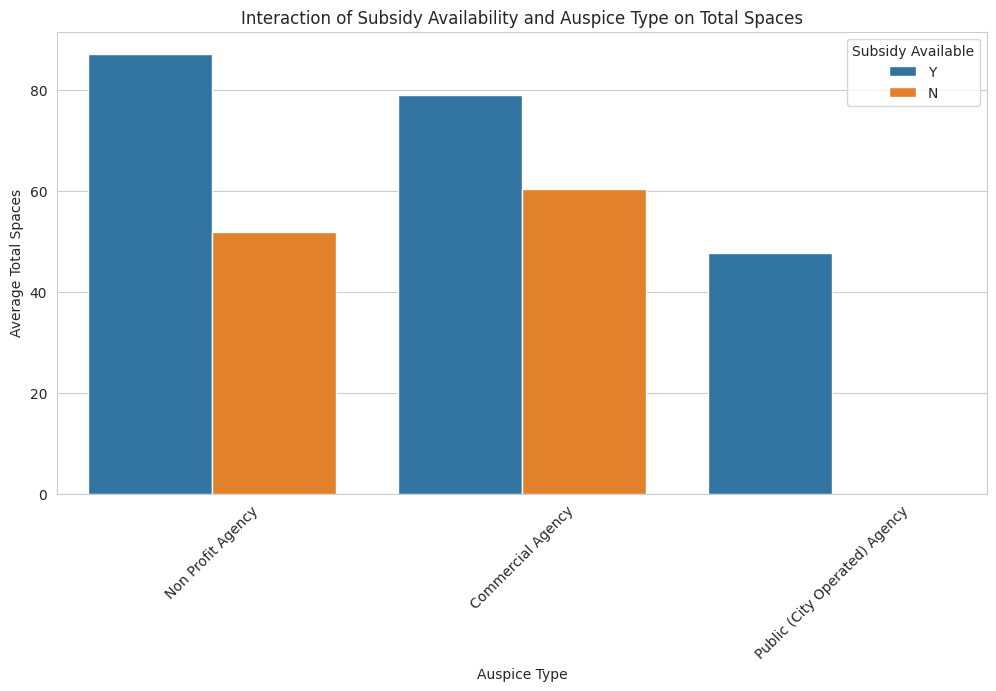

In [43]:
# Plotting the interaction between subsidy availability and auspice type on total spaces
plt.figure(figsize=(12, 6))
sns.barplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', data=df, ci=None)
plt.title('Interaction of Subsidy Availability and Auspice Type on Total Spaces')
plt.xlabel('Auspice Type')
plt.ylabel('Average Total Spaces')
plt.legend(title='Subsidy Available')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Prepare the model formula for two-way ANOVA
formula = 'TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)'
model = ols(formula, data=df).fit()

# Perform two-way ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.567996e+03,2.0,2.057586,1.282730e-01
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


In [56]:
from statsmodels.stats.multicomp import MultiComparison

df['interaction'] = df['AUSPICE'].astype(str) + '_' + df['subsidy'].astype(str)

# Conduct the post-hoc test using Tukey's HSD
mc = MultiComparison(df['TOTSPACE'], df['interaction'])
tukey_results = mc.tukeyhsd()
print(tukey_results.summary())

<ipython-input-56-52796340fc61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interaction'] = df['AUSPICE'].astype(str) + '_' + df['subsidy'].astype(str)


                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
       group1                    group2             meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------
Commercial Agency_N             Commercial Agency_Y  18.5991 0.0153   2.3733  34.8249   True
Commercial Agency_N             Non Profit Agency_N  -8.5631 0.5037  -23.273   6.1469  False
Commercial Agency_N             Non Profit Agency_Y  26.7646    0.0  17.2862   36.243   True
Commercial Agency_N Public (City Operated) Agency_Y -12.6958 0.4893 -34.2034   8.8119  False
Commercial Agency_Y             Non Profit Agency_N -27.1621 0.0008 -45.9161  -8.4082   True
Commercial Agency_Y             Non Profit Agency_Y   8.1655 0.5712  -6.8401  23.1711  False
Commercial Agency_Y Public (City Operated) Agency_Y -31.2949 0.0045  -55.747  -6.8427   True
Non Profit Agency_N             Non Profit Agency_Y  35.3277    0.0  2